## <a id = "link1"></a> Import Libraries and Load Dataset

In [145]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
# Library to impute missing values
from sklearn.impute import KNNImputer

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,BaggingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier


In [146]:
df = pd.read_csv('BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [147]:
df.shape

(10127, 21)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are total 21 columns and 10127 rows or observations in the dataset
We can see that there are no null values.

In [149]:
#checking unique values
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

we can drop clientnum as it is a unique number for each customer.

In [150]:
#Analyzing the distribution of the various attribute
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [151]:
df.nunique() # Number of unique values in a column

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [152]:
df.head(100)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
..        ...                ...           ...    ...              ...   
95  719712633  Existing Customer            64      M                1   
96  772629333  Existing Customer            45      M                3   
97  720336708  Existing Customer            53      M                3   
98  802013583  Existing Customer            56      M                3   
99  711887583  Attrited Customer            47      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
..             ...            ...             ...           ...   
95        Graduate        Married  Less than $40K          Blue   
96        Graduate        Married     $40K - $60K          Blue   
97       Doctorate        Married     $40K - $60K          Blue   
98         College        Married         $120K +          Blue   
99         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               34  ...                       4                      1   
4               21  ...                       1                      0   
..             ...  ...                     ...                    ...   
95              52  ...                       4                      3   
96              35  ...                       4                      2   
97              35  ...                       3                      2   
98              50  ...                       2                      0   
99              37  ...                       3                      3   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
3         3313.0                 2517            796.0                 1.405   
4         4716.0                    0           4716.0                 2.175   
..           ...                  ...              ...                   ...   
95        1709.0                  895            814.0                 1.656   
96        3454.0                 1200           2254.0                 0.597   
97        3789.0                 1706           2083.0                 1.047   
98        9689.0                 2250           7439.0                 0.576   
99        5449.0                 1628           3821.0                 0.696   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              1144              42                1.625   
1              1291              33                3.714   
2              1887              20                2.333   
3              1171              20                2.333   
4               816              28                2.500   
..              ...             ...                  ...   
95             1673              32     

In [153]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#EDA
Univariate Analysis

In [119]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

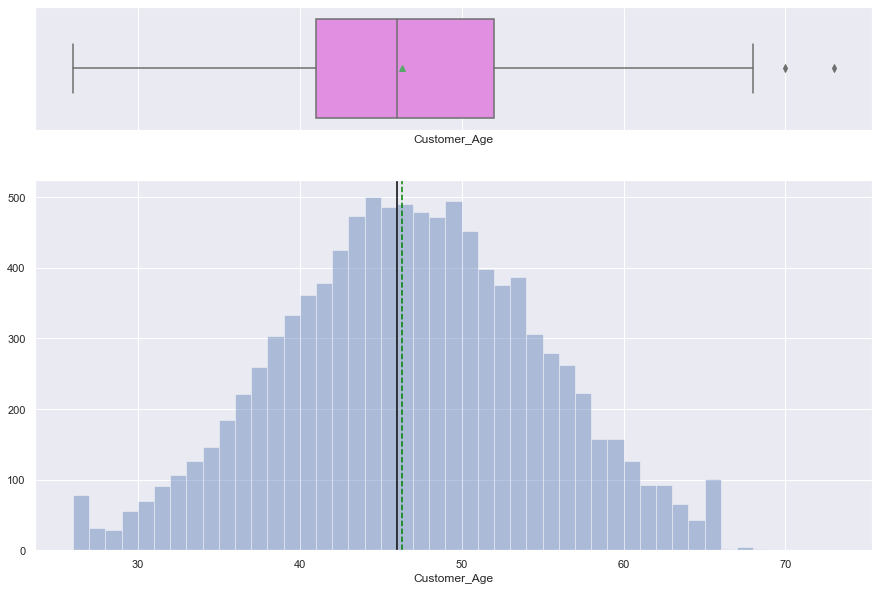

In [71]:
# Observations on Customer_age
histogram_boxplot(df["Customer_Age"])

As per the boxplot, there are 2 outliers in 'Customer Age' variable
There are spikes at ages 10 and 65.

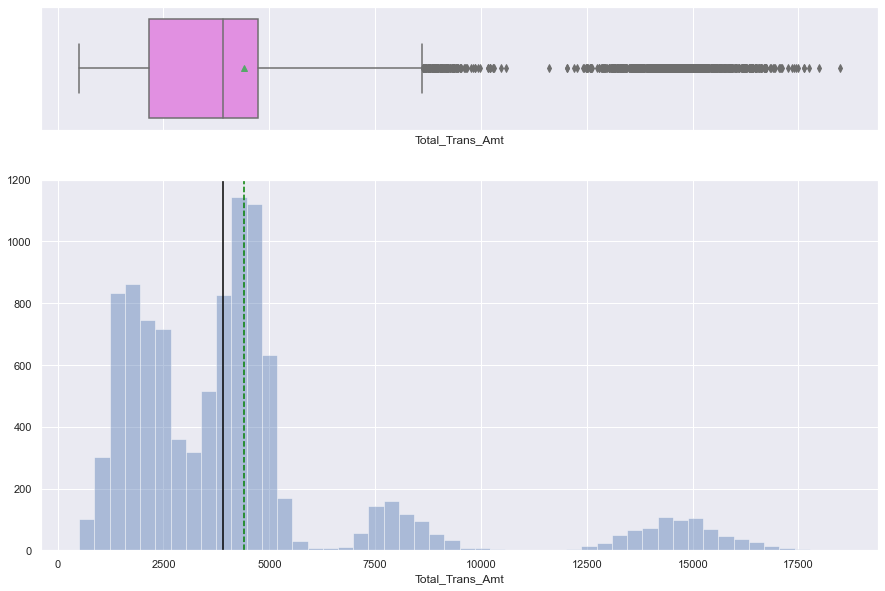

In [72]:
# observations on transactions
histogram_boxplot(df["Total_Trans_Amt"])

In [73]:
from scipy import stats
z=np.abs(stats.zscore(df.Total_Trans_Amt))
print(z)

[0.95970657 0.91643261 0.74098169 ... 1.73299393 1.17484807 1.73387707]


In [74]:
threshold=3
df1=df[(z<3)]
print(df1)


       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10119  716893683  Attrited Customer            55      F                3   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

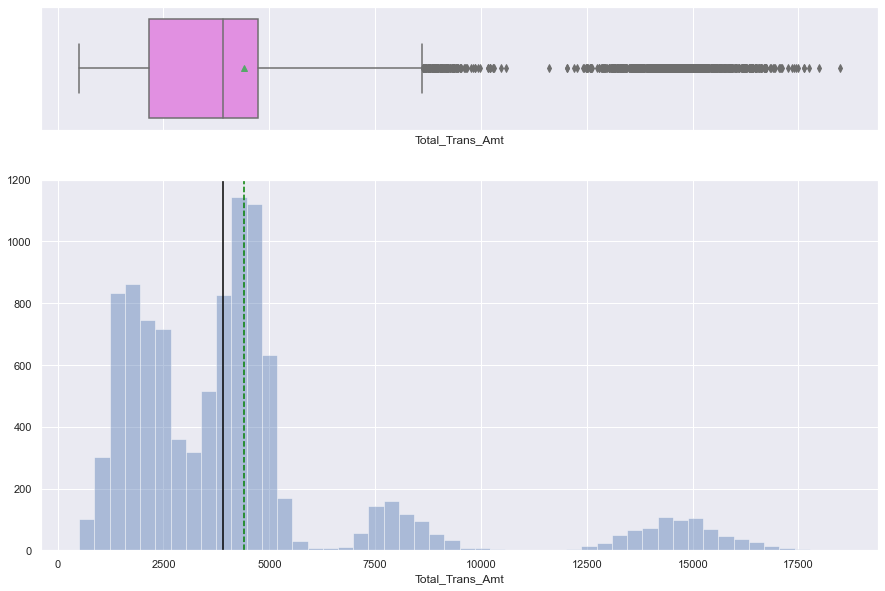

In [75]:
# Observations on Customer_age
histogram_boxplot(df["Total_Trans_Amt"])

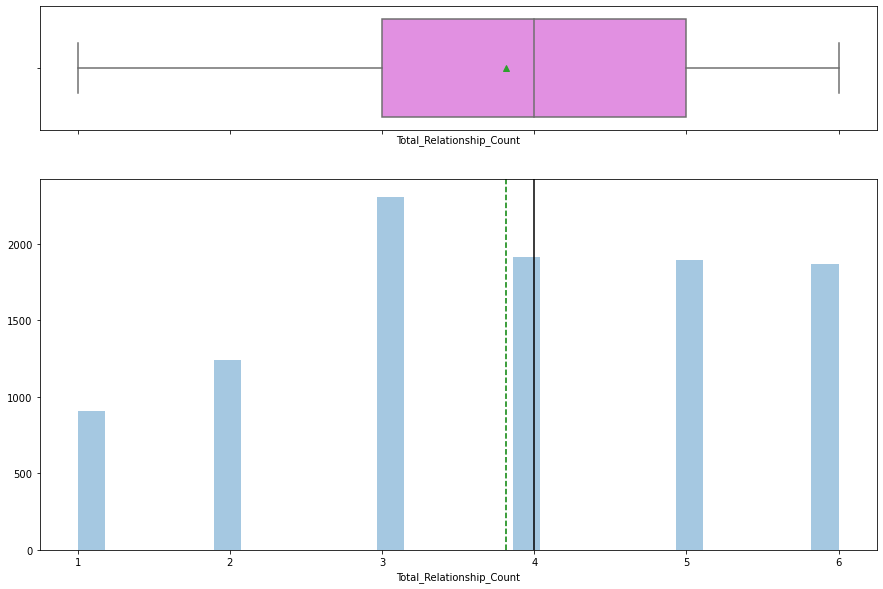

In [17]:
histogram_boxplot(df["Total_Relationship_Count"])

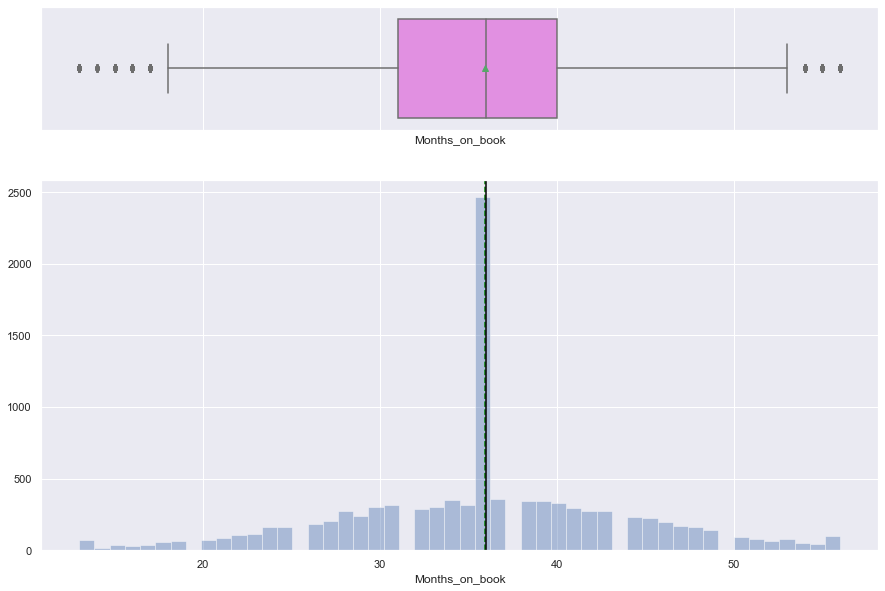

In [76]:
histogram_boxplot(df["Months_on_book"])

In [77]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=df)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

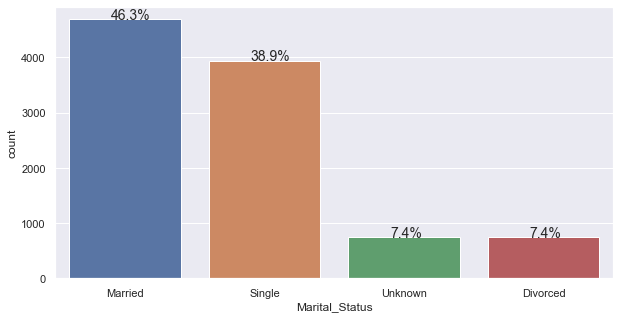

In [78]:
perc_on_bar(df["Marital_Status"])

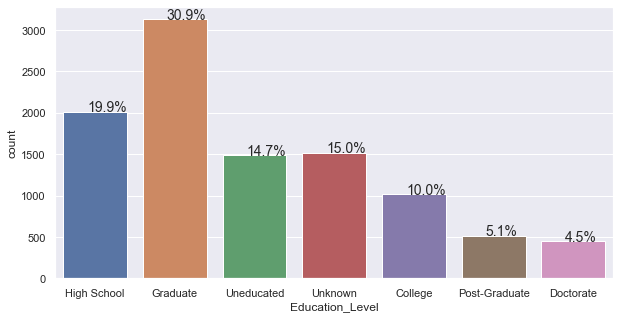

In [79]:
# observations on Education
perc_on_bar(df["Education_Level"])

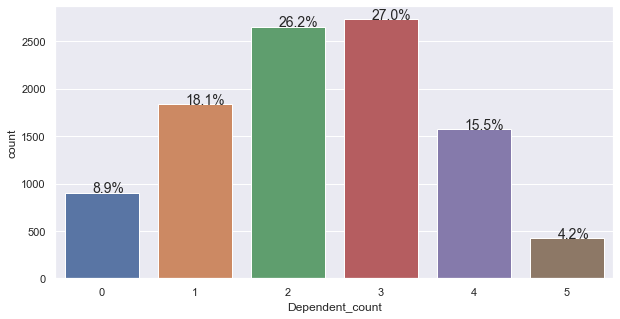

In [80]:
perc_on_bar(df["Dependent_count"])

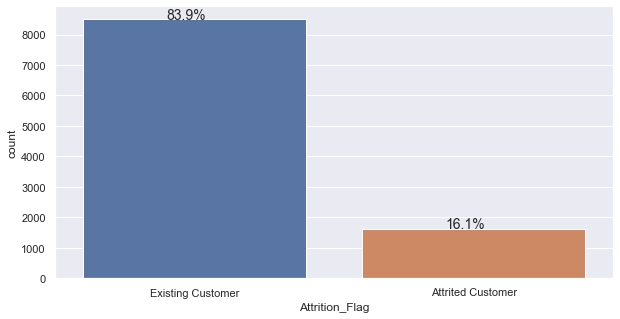

In [81]:
perc_on_bar(df["Attrition_Flag"])

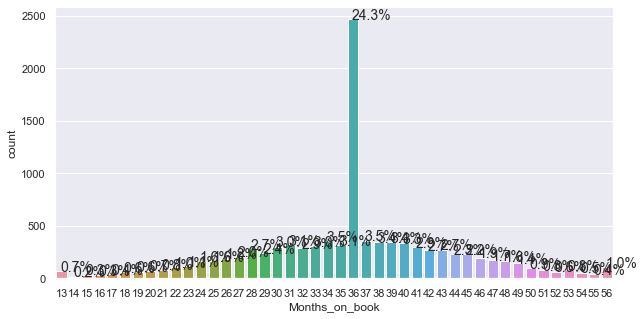

In [82]:
perc_on_bar(df["Months_on_book"])

#Bivariate Analysis

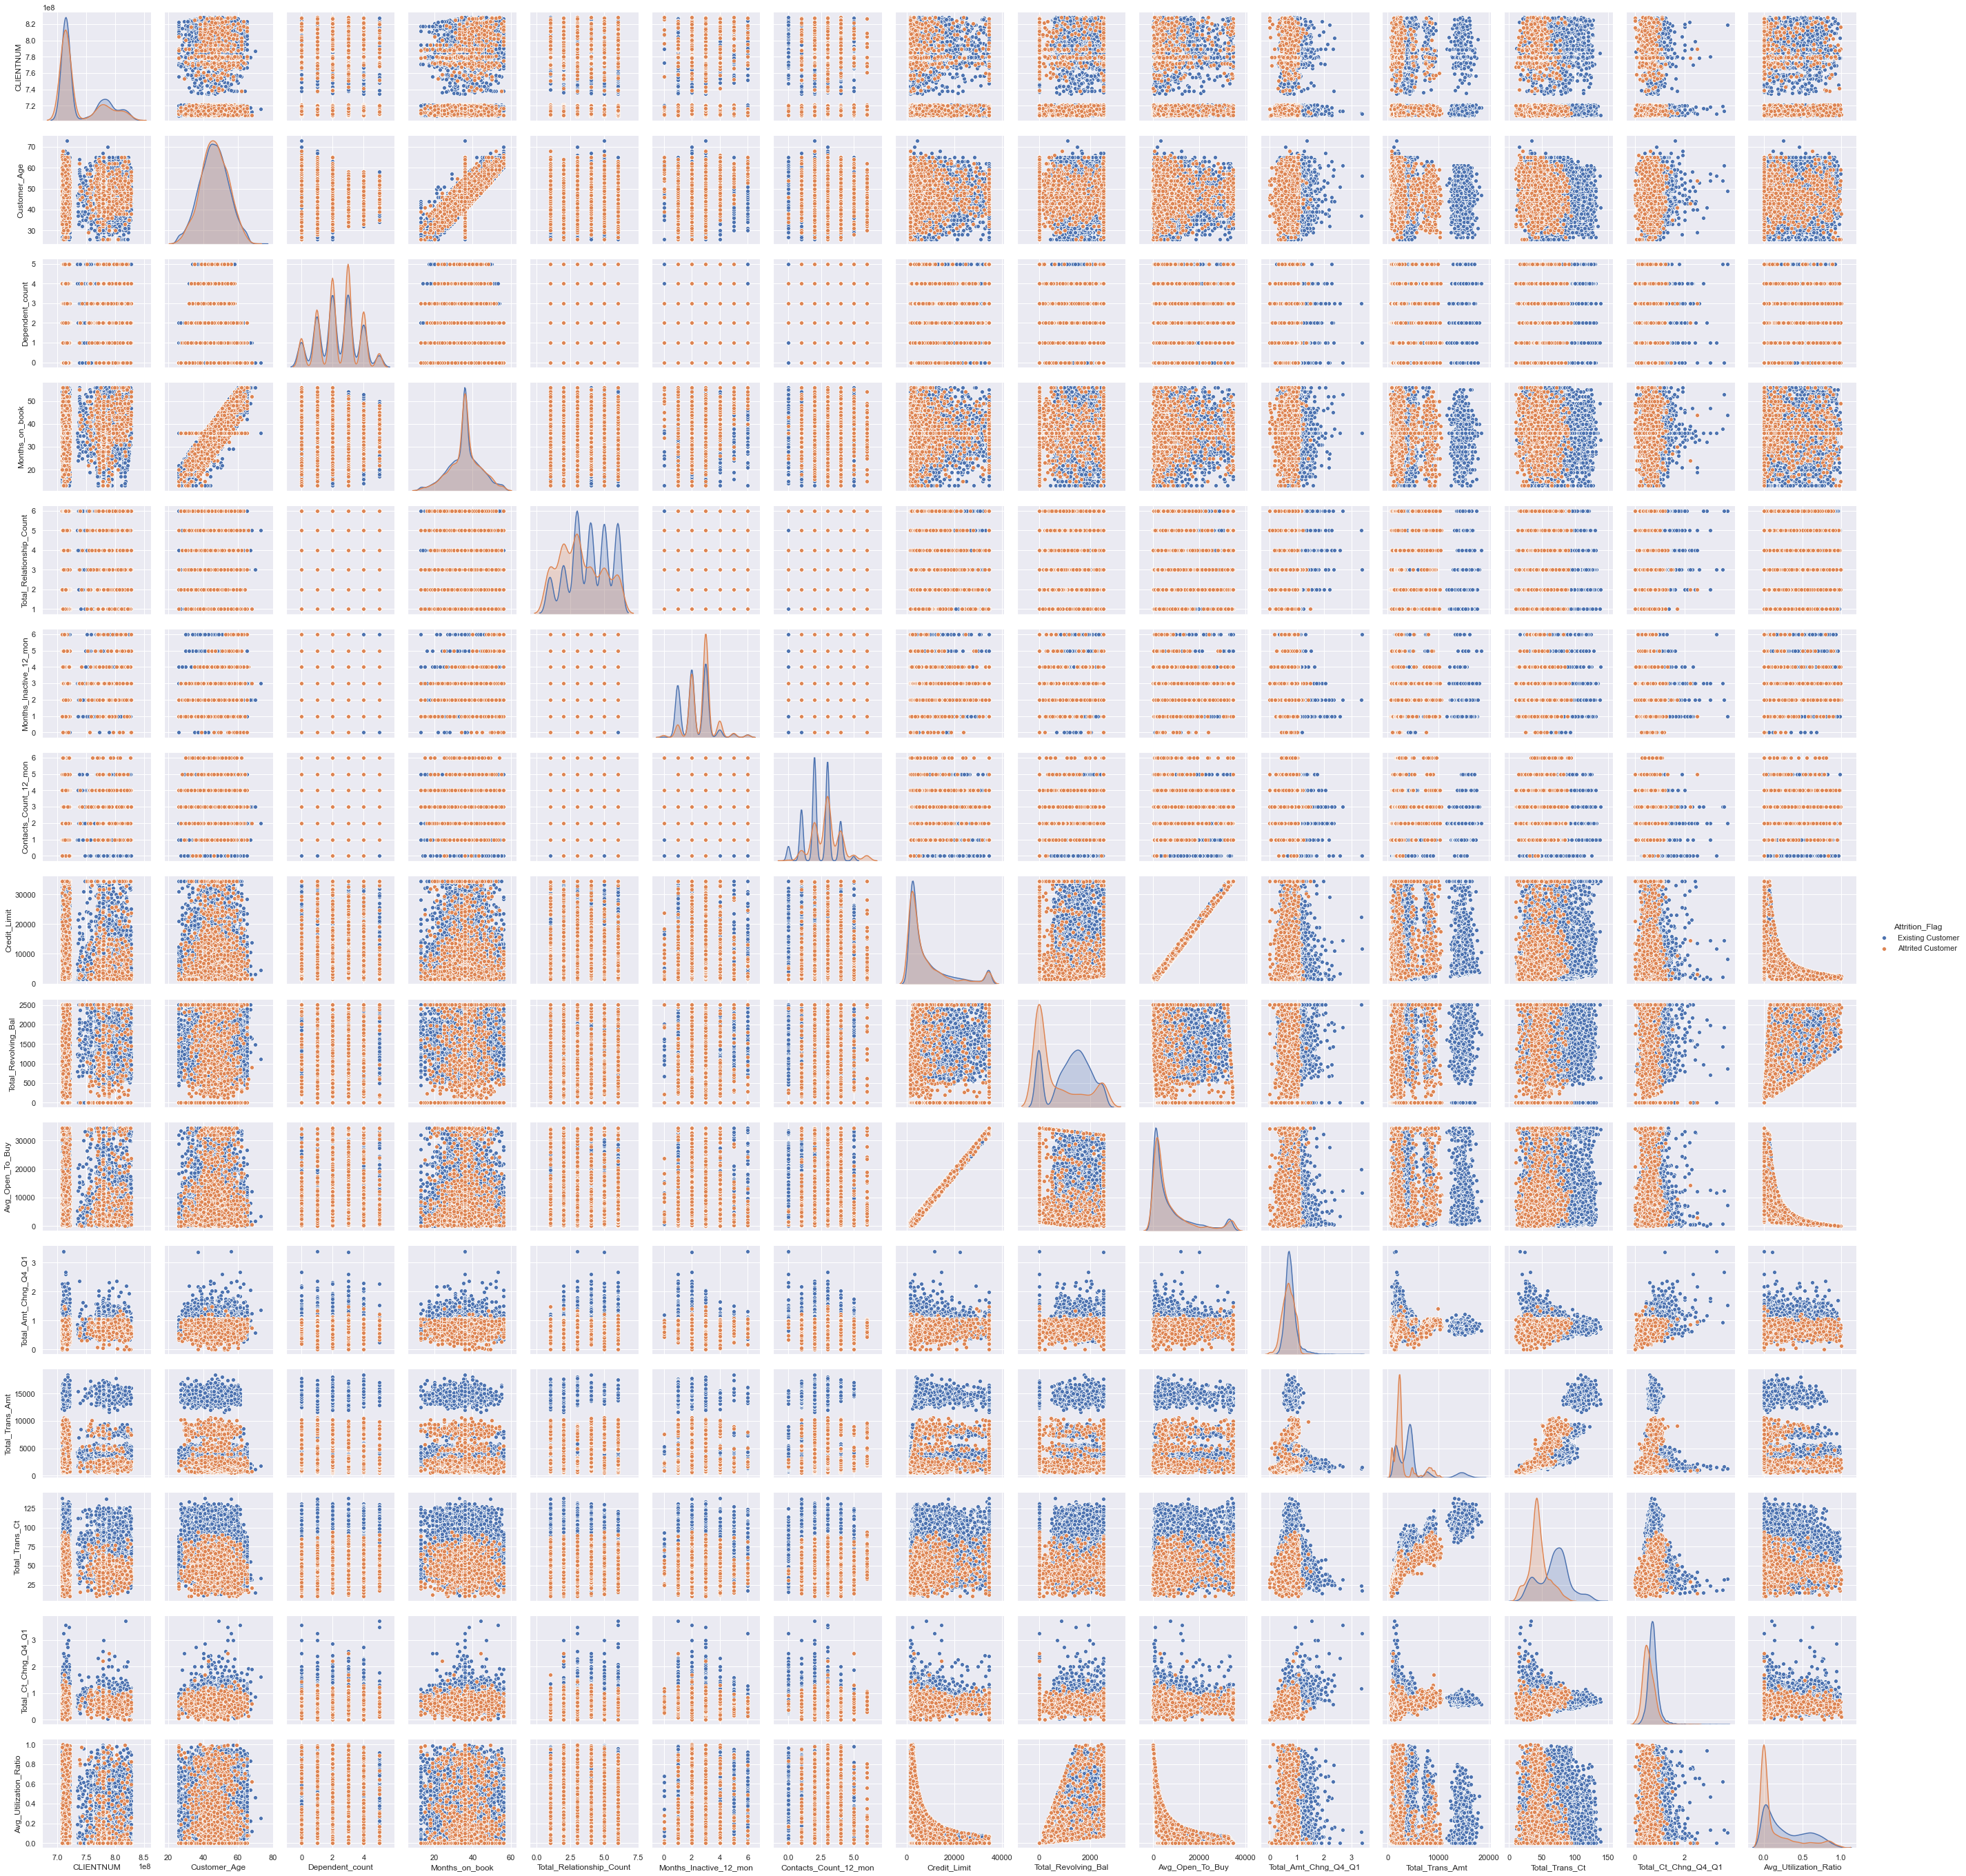

In [25]:
sns.pairplot(df, hue="Attrition_Flag")

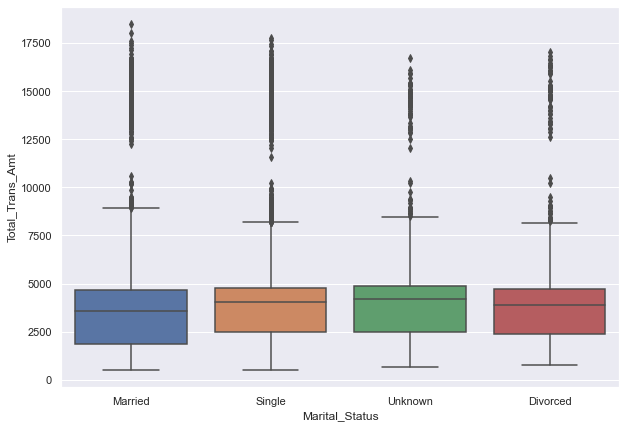

In [83]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=df, orient="vertical")

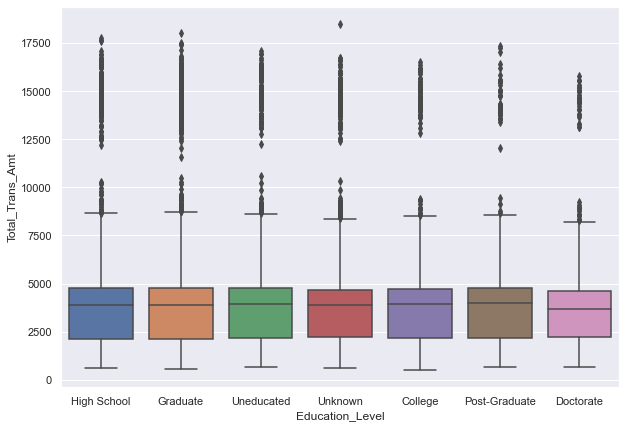

In [84]:
sns.boxplot(y="Total_Trans_Amt", x="Education_Level", data=df, orient="vertical")

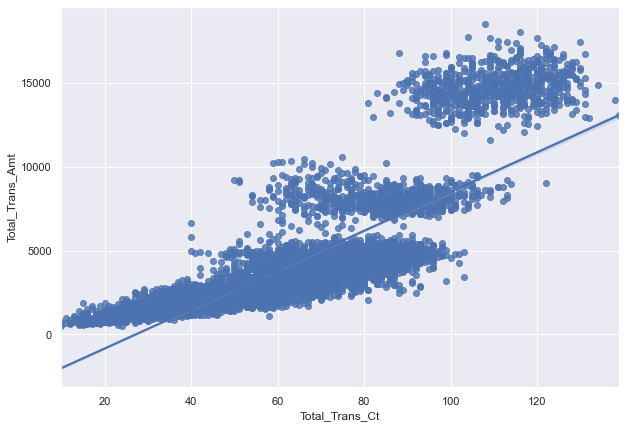

In [85]:
sns.regplot(y=df.Total_Trans_Amt, x=df.Total_Trans_Ct)

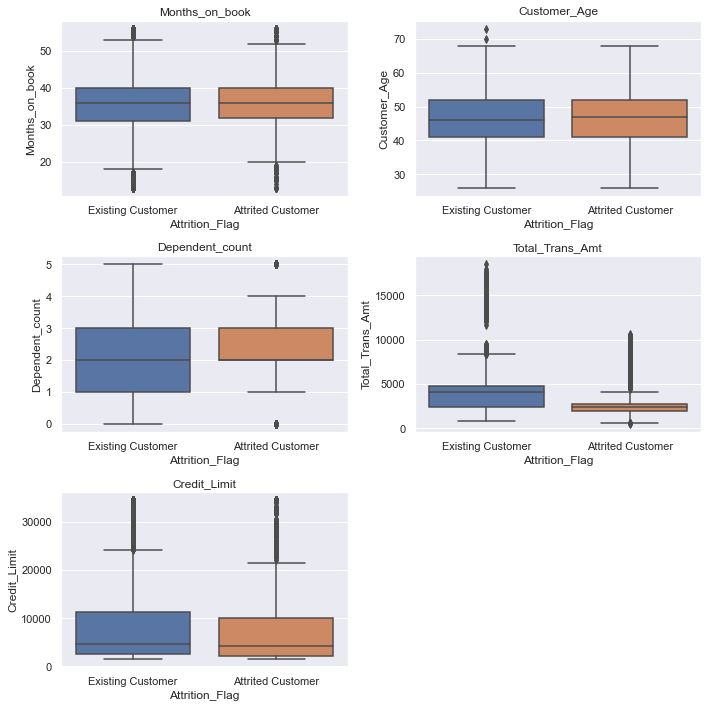

In [86]:
cols = df[["Months_on_book", "Customer_Age", "Dependent_count", "Total_Trans_Amt","Credit_Limit"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Attrition_Flag"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [120]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, df["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, df["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


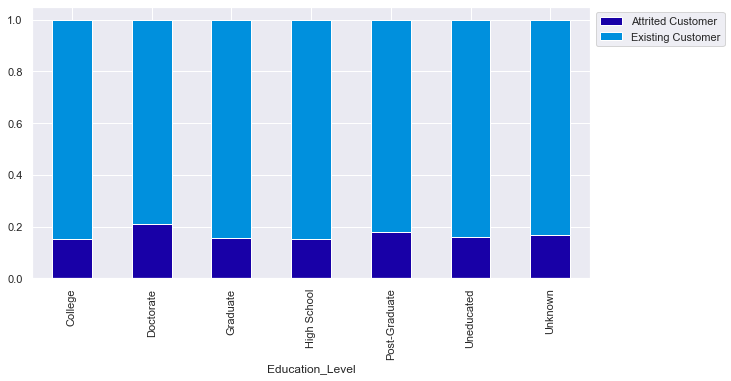

In [88]:
stacked_plot(df["Education_Level"])

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


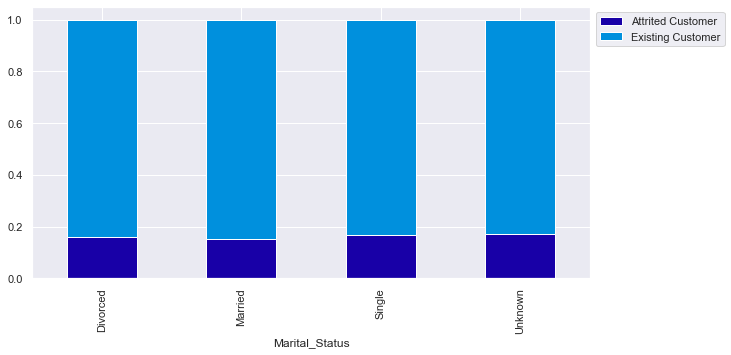

In [89]:
stacked_plot(df["Marital_Status"])

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


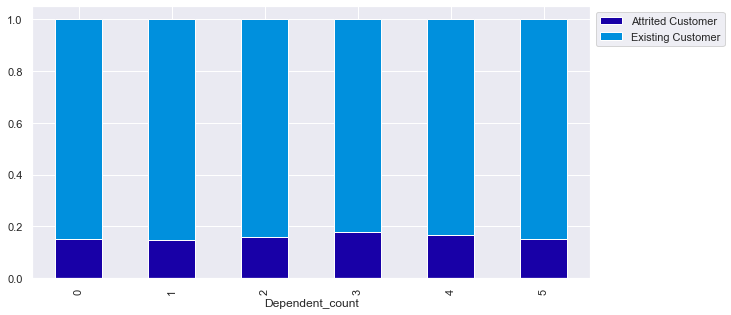

In [205]:
stacked_plot(df["Dependent_count"])

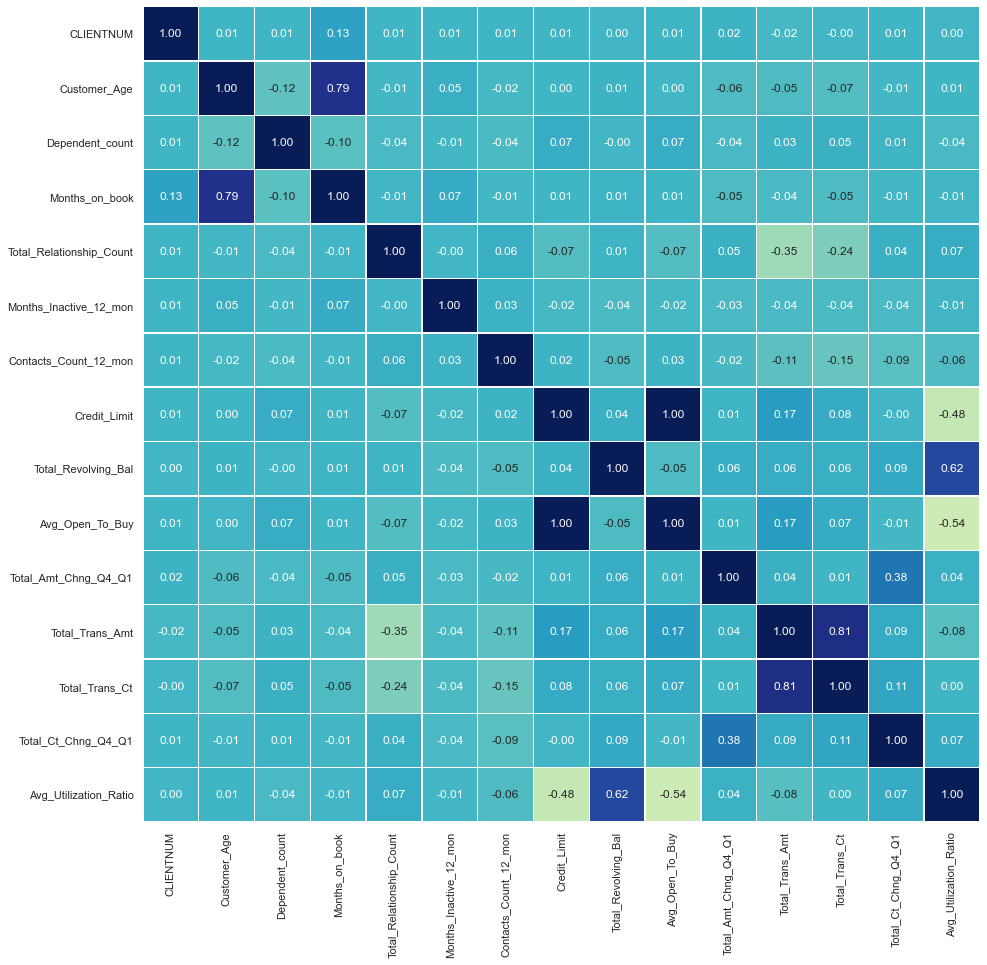

In [90]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

Data Preprocessing:

In [154]:
# Dropping columns - ID
df.drop(columns=["CLIENTNUM"], inplace=True)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [155]:
# Making a list of all categorical variables
cat_col = ["Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platin

In [156]:
replaceStruct = {
                "Attrition_Flag":     {"Existing Customer": 0, "Attrited Customer": 1 },
                 "Income_Category": {"Less than $40K": 1, "$40K - $60K":2 , "$60K - $80K": 3, "$80K - $120K": 4,"$120K +": 5, "Unknown": 0}
                }
oneHotCols=["Marital_Status","Gender","Card_Category","Education_Level"]

In [157]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(100)

Attrition_Flag  Customer_Age  Dependent_count  Income_Category  \
0                0            45                3                3   
1                0            49                5                1   
2                0            51                3                4   
3                0            40                4                1   
4                0            40                3                3   
..             ...           ...              ...              ...   
95               0            64                1                1   
96               0            45                3                2   
97               0            53                3                2   
98               0            56                3                5   
99               1            47                2                4   

    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0               39                         5                       1   
1               44                         6                       1   
2               36                         4                       1   
3               34                         3                       4   
4               21                         5                       1   
..             ...                       ...                     ...   
95              52                         6                       4   
96              35                         5                       4   
97              35                         5                       3   
98              50                         3                       2   
99              37                         2                       3   

    Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
0                       3       12691.0                  777  ...   
1                       2        8256.0                  864  ...   
2                       0        3418.0                    0  ...   
3                       1        3313.0                 2517  ...   
4                       0        4716.0                    0  ...   
..                    ...           ...                  ...  ...   
95                      3        1709.0                  895  ...   
96                      2        3454.0                 1200  ...   
97                      2        3789.0                 1706  ...   
98                      0        9689.0                 2250  ...   
99                      3        5449.0                 1628  ...   

    Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
0                    0                       0                     0   
1                    0                       0                     0   
2                    0                       0                     0   
3                    0                       0                     0   
4                    0                       0                     0   
..                 ...                     ...                   ...   
95                   0                       0                     0   
96                   0                       0                     0   
97                   0                       0                     0   
98                   0                       0                     0   
99                   0                       0                     0   

    Education_Level_College  Education_Level_Doctorate  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
..                      ...                        ...   
95                        0                          0   
96                        0                          0   
97                        0                          1   
98                      

In [158]:
#Split Data
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
y = df["Attrition_Flag"]

In [159]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 32) (3039, 32)
(7088,) (3039,)


In [160]:
df.isnull().sum()

Attrition_Flag                   0
Customer_Age                     0
Dependent_count                  0
Income_Category                  0
Months_on_book                   0
Total_Relationship_Count         0
Months_Inactive_12_mon           0
Contacts_Count_12_mon            0
Credit_Limit                     0
Total_Revolving_Bal              0
Avg_Open_To_Buy                  0
Total_Amt_Chng_Q4_Q1             0
Total_Trans_Amt                  0
Total_Trans_Ct                   0
Total_Ct_Chng_Q4_Q1              0
Avg_Utilization_Ratio            0
Marital_Status_Divorced          0
Marital_Status_Married           0
Marital_Status_Single            0
Marital_Status_Unknown           0
Gender_F                         0
Gender_M                         0
Card_Category_Blue               0
Card_Category_Gold               0
Card_Category_Platinum           0
Card_Category_Silver             0
Education_Level_College          0
Education_Level_Doctorate        0
Education_Level_Grad

In [128]:
df.dtypes

Attrition_Flag                     int64
Customer_Age                       int64
Dependent_count                    int64
Income_Category                    int64
Months_on_book                     int64
Total_Relationship_Count           int64
Months_Inactive_12_mon             int64
Contacts_Count_12_mon              int64
Credit_Limit                     float64
Total_Revolving_Bal                int64
Avg_Open_To_Buy                  float64
Total_Amt_Chng_Q4_Q1             float64
Total_Trans_Amt                    int64
Total_Trans_Ct                     int64
Total_Ct_Chng_Q4_Q1              float64
Avg_Utilization_Ratio            float64
Marital_Status_Divorced            uint8
Marital_Status_Married             uint8
Marital_Status_Single              uint8
Marital_Status_Unknown             uint8
Gender_F                           uint8
Gender_M                           uint8
Card_Category_Blue                 uint8
Card_Category_Gold                 uint8
Card_Category_Pl

In [161]:
df.drop(columns=["Education_Level_Unknown","Marital_Status_Unknown"], inplace=True)
df.head()

Attrition_Flag  Customer_Age  Dependent_count  Income_Category  \
0               0            45                3                3   
1               0            49                5                1   
2               0            51                3                4   
3               0            40                4                1   
4               0            40                3                3   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
0                      3       12691.0                  777  ...   
1                      2        8256.0                  864  ...   
2                      0        3418.0                    0  ...   
3                      1        3313.0                 2517  ...   
4                      0        4716.0                    0  ...   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  Education_Level_College  Education_Level_Doctorate  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     0                        0                          0   
3                     0                        0                          0   
4                     0                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           1  

[5 rows x 31 columns]

Building the model

In [162]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [163]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [164]:
lr = LogisticRegression(random_state=1)

In [165]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

Accuracy on training set :  0.8769751693002258
Accuracy on test set :  0.8779203685422836
Recall on training set :  0.4310798946444249
Recall on test set :  0.4262295081967213
Precision on training set :  0.6867132867132867
Precision on test set :  0.6956521739130435


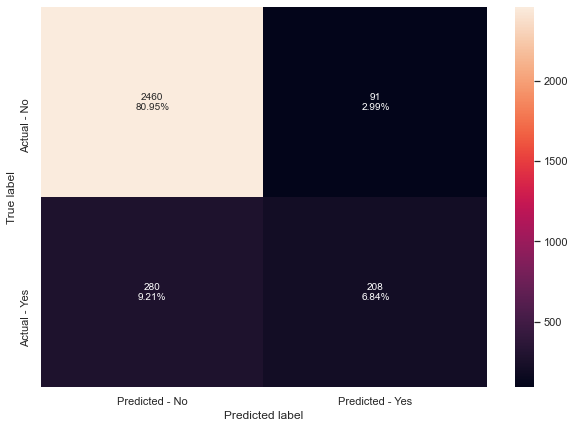

In [166]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

Oversampling train data using SMOTE

In [167]:
from imblearn.over_sampling import SMOTE

In [168]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



In [169]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

Accuracy on training set :  0.7965204236006052
Accuracy on test set :  0.8022375781507075
Recall on training set :  0.7866868381240545
Recall on test set :  0.7663934426229508
Precision on training set :  0.8024691358024691
Precision on test set :  0.4343786295005807


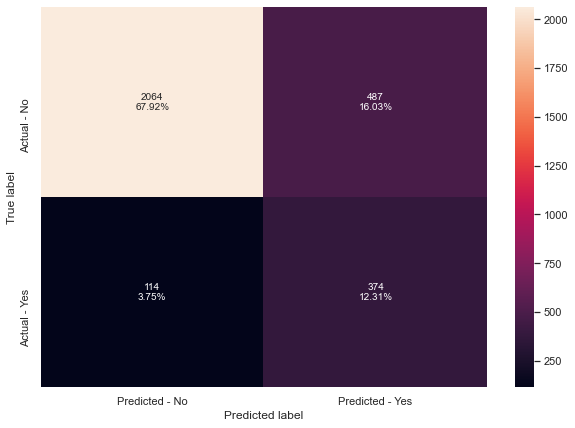

In [170]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

Regularization

In [171]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7050764834425954
Accuracy on test set :  0.8042119118130964
Recall on training set :  0.5690031938140864
Recall on test set :  0.5512295081967213
Precision on training set :  0.7817551963048499
Precision on test set :  0.4170542635658915


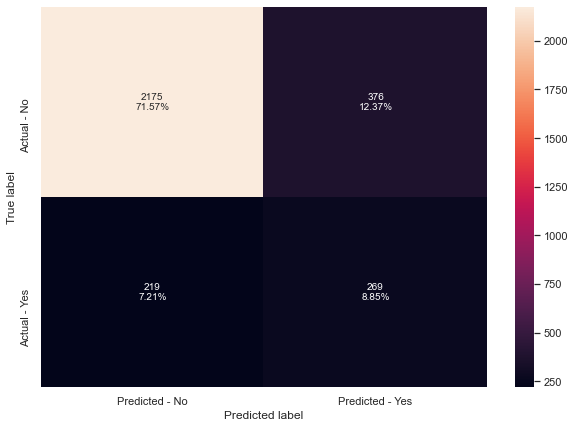

In [172]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

Undersampling train data using SMOTE

In [173]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [174]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



Logistic Regression on undersampled data

In [175]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

Accuracy on training set :  0.8156277436347673
Accuracy on test set :  0.8318525830865416
Recall on training set :  0.797190517998244
Recall on test set :  0.7807377049180327
Precision on training set :  0.8277119416590701
Precision on test set :  0.4853503184713376


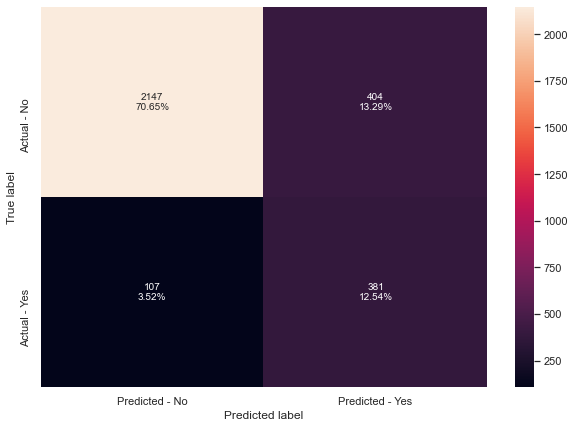

In [176]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [177]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 58.38356905479558
RF: 76.99667671381096
BG: 81.21338588762654
GBM: 85.0745807249401
ADB: 84.54710564958651
XGB: 88.23672617667518
DTREE: 80.0722621531803


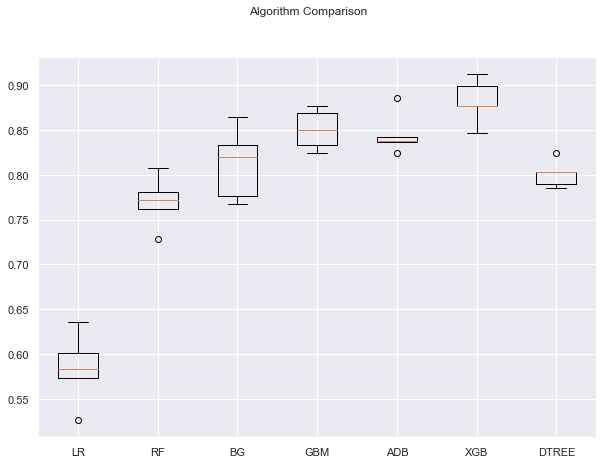

In [178]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
Based on the above scores, XGBoost, Adaboost and Gradient Boost Models are the best three models

Hyperparameter Tuning

XGBOOST :
GridSearchCV:

In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

RandomizedSearchCV::

In [179]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9640041734291677:
Wall time: 1min 34s


In [180]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8481123792800702
Accuracy on test set :  0.7561697926949654
Recall on training set :  0.9780509218612818
Recall on test set :  0.9672131147540983
Precision on training set :  0.7763066202090593
Precision on test set :  0.3943191311612364


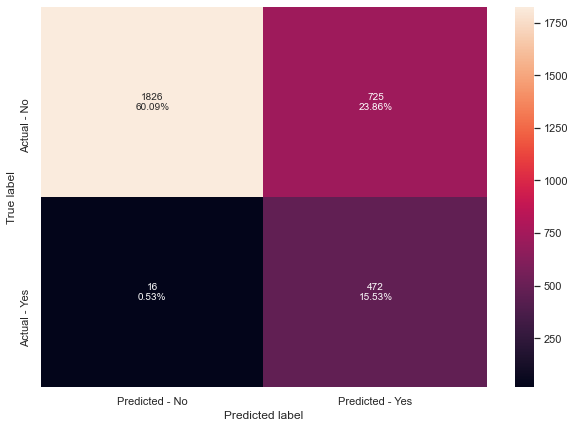

In [183]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train_un,X_test,y_train_un,y_test)
#Calculating different metrics
#get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

AdaBoost:
    GridSearchCV:
        

In [184]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 100} 
Score: 0.8840984620140659
Wall time: 8min 11s


In [185]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9938542581211589
Accuracy on test set :  0.9615004935834156
Recall on training set :  0.9894644424934153
Recall on test set :  0.8463114754098361
Precision on training set :  0.9982285208148804
Precision on test set :  0.9076923076923077


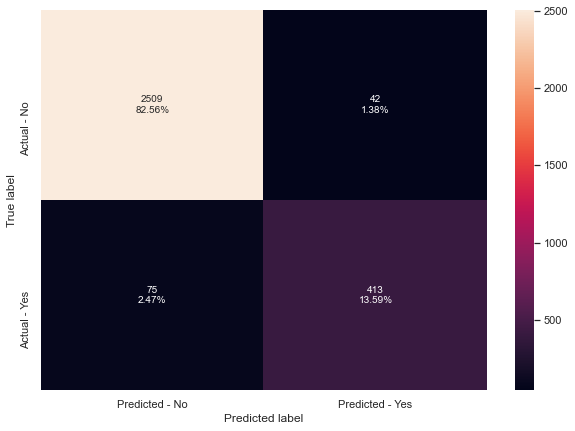

In [187]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

In [ ]:
RandomizedSearchCV

In [203]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8832212690316098:
Wall time: 3min 44s


Accuracy on training set :  0.9683933274802459
Accuracy on test set :  0.8524590163934426
Recall on training set :  0.9683933274802459
Recall on test set :  0.8524590163934426
Precision on training set :  0.9972875226039783
Precision on test set :  0.9142857142857143


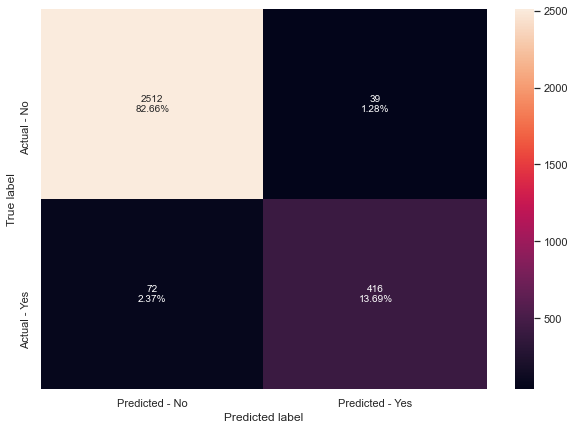

In [204]:
# Calculating different metrics
get_metrics_score(abc_tuned2,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

Gradient Boost Models:

In [ ]:
Random Search CV:

In [196]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingclassifier', GradientBoostingClassifier(random_state=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingclassifier': GradientBoostingClassifier(random_state=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_impurity_split': None,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 2,
 'gr

In [198]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {'gradientboostingclassifier__n_estimators': np.arange(50,200,25), 
              'gradientboostingclassifier__subsample':[0.7,0.8,0.9,1],
              'gradientboostingclassifier__max_features':[0.7,0.8,0.9,1],
              'gradientboostingclassifier__max_depth':[3,5,7,10]
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned2.best_params_,gbm_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__max_features': 0.9, 'gradientboostingclassifier__max_depth': 5} with CV score=0.8902504057500579:
Wall time: 8min 11s


Accuracy on training set :  0.990342405618964
Accuracy on test set :  0.8668032786885246
Recall on training set :  0.990342405618964
Recall on test set :  0.8668032786885246
Precision on training set :  0.9991142604074402
Precision on test set :  0.9484304932735426


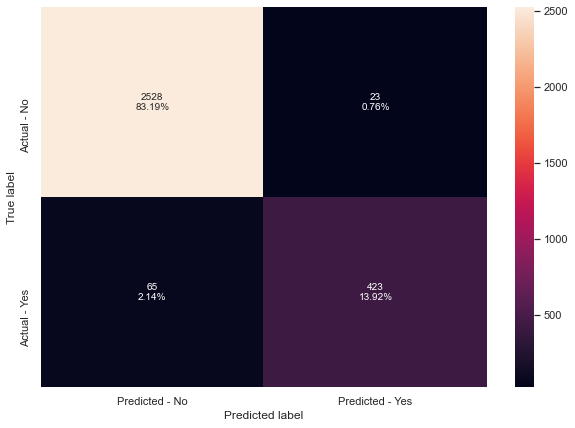

In [201]:
# Calculating different metrics
get_metrics_score(gbm_tuned2,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned2, y_test)

In [ ]:
Comparing all models

In [206]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned2,gbm_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, X_train_un,X_test,y_train_un,y_test)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

Accuracy on training set :  0.9938542581211589
Accuracy on test set :  0.9615004935834156
Recall on training set :  0.9894644424934153
Recall on test set :  0.8463114754098361
Precision on training set :  0.9982285208148804
Precision on test set :  0.9076923076923077
Accuracy on training set :  0.9683933274802459
Accuracy on test set :  0.8524590163934426
Recall on training set :  0.9683933274802459
Recall on test set :  0.8524590163934426
Precision on training set :  0.9972875226039783
Precision on test set :  0.9142857142857143
Accuracy on training set :  0.8481123792800702
Accuracy on test set :  0.7561697926949654
Recall on training set :  0.9780509218612818
Recall on test set :  0.9672131147540983
Precision on training set :  0.7763066202090593
Precision on test set :  0.3943191311612364
Accuracy on training set :  0.990342405618964
Accuracy on test set :  0.8668032786885246
Recall on training set :  0.990342405618964
Recall on test set :  0.8668032786885246
Precision on training 

In [207]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "XGBoost with RandomizedSearchCV",
            "GBM with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
2   XGBoost with RandomizedSearchCV        0.848112       0.756170   
3       GBM with RandomizedSearchCV        0.990342       0.866803   
1  Adaboost with RandomizedSearchCV        0.968393       0.852459   
0        Adaboost with GridSearchCV        0.993854       0.961500   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
2      0.978051     0.967213         0.776307        0.394319  
3      0.990342     0.866803         0.999114        0.948430  
1      0.968393     0.852459         0.997288        0.914286  
0      0.989464     0.846311         0.998229        0.907692

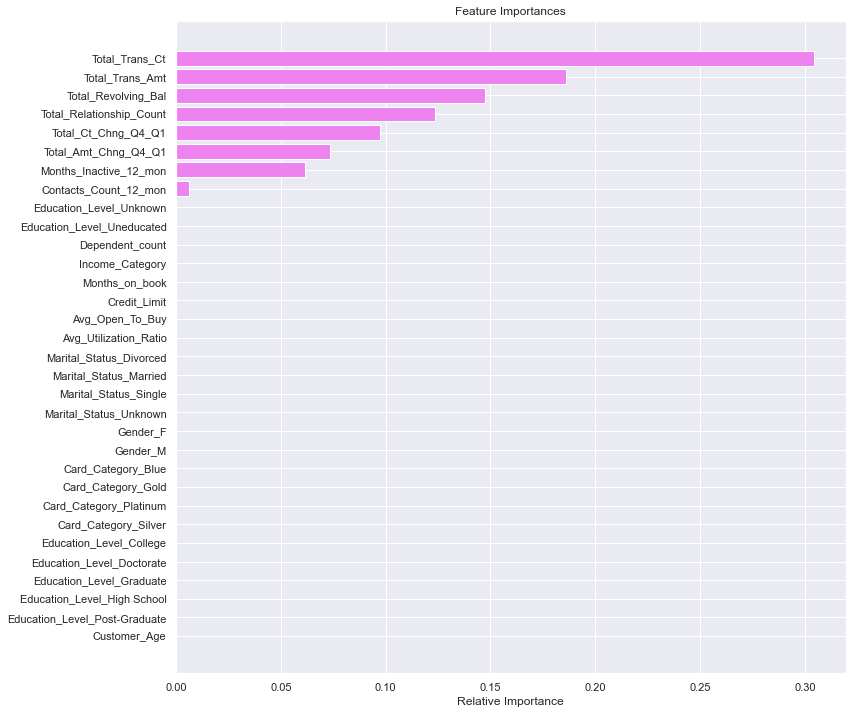

In [199]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
Business Insights:
    
    Total transaction count and amount have been the best and top performaners for churn not to happen. 
    In my case XGBoost is the top model that performend well. 
    Here, I did not receive the output as these models are taking long time than expected on my machine. So my conclusions are based on
    XGBOOst algorithm. 
    Customers who are graduates and with dependent count between 2 and 3 are those who can stay. 
    Bank can going forward give the Credit cards to those customers for avoiding churn.
    Married people are the highest customers in this Bank. There is a very low rate to exit the bank for Married people. 
    Bank can also offer discounts and provide some benefits or discounts or promotional offers based on age, martail status , educatation
    to keep customers and avoid churn. 
    
    